# Matplotlib

*Chris Wu*  
*OCt, 2016*

**注意：建议无经验的读者先阅读 [Numpy & Pandas](https://github.com/wklchris/Note-by-Jupyter/blob/master/Python/Numpy%20&%20Pandas.ipynb)。不过如果你只是想要学习简单的画图功能而不是一整套数据可视化方案，你可以不必学习 Numpy&Pandas 而直接阅读本笔记。**

---
# 目录

1. [引言：简单的示例](#cha:intro)

---

本手册中的每一个例子都默认加载了以下三行内容：

In [1]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

# 引言：简单的示例 <a id='cha:intro'></a>

最基本的命令是 plt.plot 和 plt.show 命令：

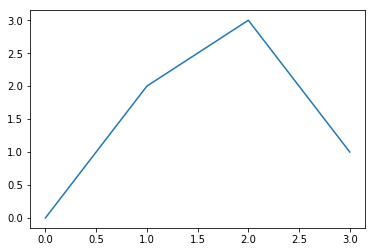

In [2]:
plt.plot([0, 2, 3, 1])
plt.show()

更常规的做法是分别指定横坐标和纵坐标数据集：

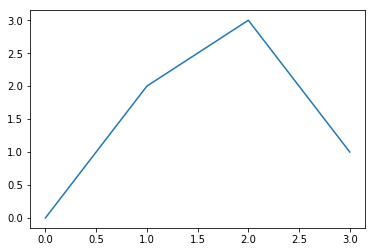

In [3]:
x = [0, 1, 2, 3]
y = [0, 2, 3, 1]
plt. plot(x, y)
plt.show()

如果你有 NumPy 相关的知识，你也可以使用 np.linspace 命令来生成：

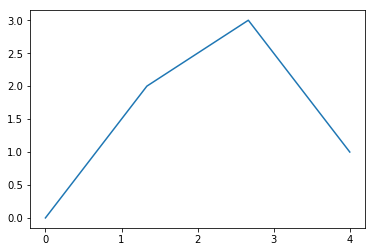

In [4]:
x = np.linspace (0, 4, 4)
y = [0, 2, 3, 1]
plt.plot(x, y)
plt.show()